In [2]:
import pandas as pd
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [12]:
filepath = './dataFolder/TrackingData_2022_11_10/x_y_ordered_polyFit/'
X_arr_files = glob.glob(filepath + '*_x_proboscis_ordered.csv')
Y_arr_files = glob.glob(filepath + '*_y_proboscis_ordered.csv')
p_fit_files = glob.glob(filepath + '*.npy')

## run the following cells to make figure of the proboscis fit line

In [11]:
def MakeFigureForFit(x, y, p, ax):
    ax.plot(x, y, '.b', p(y),y,'-k')
    ax.set_xlim([x.min()-10,x.max() + 10])
    ax.set_ylim([y.min() -10, y.max() + 10])
    return()

In [14]:
image_folder = './dataFolder/TrackingData_2022_11_10/x_y_ordered_polyFit/Polyfit3_testFigures/'

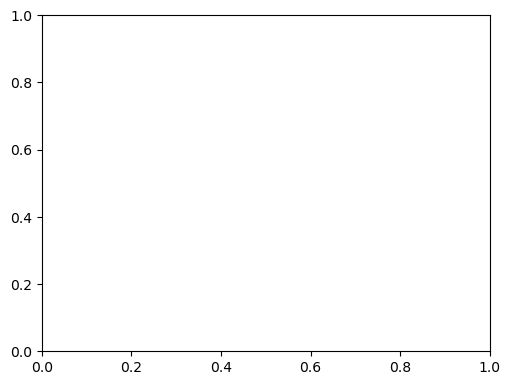

In [36]:
# make figures to access the interpolation
fig = plt.figure()
ax = fig.add_axes([0.3, 0.3, 0.7, 0.7])

for f in X_arr_files[0:1]:
    X_arr = pd.read_csv(f, index_col=0)
    
    mothID = f.split('\\')[-1][:-24]
    Y_arr = pd.read_csv([file for file in Y_arr_files if mothID in file][0], index_col=0)
    p_fit = np.load([file for file in p_fit_files if mothID in file][0])

    # create a directory to keep the images
    directory_name = image_folder + mothID + '/'
    os.makedirs(directory_name, exist_ok=True)

    for ii, p in enumerate(p_fit):
        x = X_arr.loc[ii,:].values
        y = Y_arr.loc[ii,:].values
        p = np.poly1d(p)
        MakeFigureForFit(x,y,p,ax)
        figname = str(ii).zfill(4) + '.png'
        plt.savefig(directory_name + figname)

        plt.cla()

In [ ]:
# from scipy import interpolate
# 
# def interpol_points(x, y):
#     tck, u = interpolate.splprep([x, y], s=3)
#     new_points = interpolate.splev(u, tck, der=0)
#     return(new_points)

In [ ]:
# new_x = []
# new_y = []
# for r, data in X_arr.iterrows():
#     x = data.values
#     y = Y_arr.loc[r, :].values
#     pts__ = interpol_points(x, y)
#     x__ = pts__[0]
#     y__ = pts__[1]
#     new_x.append(x__)
#     new_y.append(y__)